# Import data set and perform initial steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as dt    

In [3]:
# import data

bids = pd.read_csv("android_bids_us.csv")

In [4]:
# first look at the first five rows

bids.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


In [5]:
# view basic sample statistics on numerical fields

bids.describe()

,utc_time,device_height,device_width,click
count,3.148828e+06,3.148828e+06,3.148828e+06,3.148828e+06
mean,1.538334e+12,1.180970e+03,1.152078e+03,6.770741e-02
std,2.320255e+09,5.190901e+02,4.526602e+02,2.512432e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.536460e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.538472e+12,1.080000e+03,1.080000e+03,0.000000e+00
75%,1.540095e+12,1.280000e+03,1.280000e+03,0.000000e+00
max,1.542630e+12,3.120000e+03,3.120000e+03,1.000000e+00


In [6]:
bids.dtypes

bidid            object
utc_time          int64
app_id           object
user_state       object
user_isp         object
device_maker     object
device_model     object
device_osv       object
device_height     int64
device_width      int64
marketplace      object
click             int64
dtype: object

In [7]:
# display null values
# There are nulls in only three fields: user_isp, device_maker, and device_model.
# user_isp is going to be subsumed by the state variable, and it would be somewhat strange if a device brand and model influenced a person's susceptibility to clicking.

bids.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     964004
device_model     963858
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
dtype: int64

In [8]:
# drop the three columns from above

bids = bids.drop(['user_isp','device_maker','device_model'], axis=1)
bids.columns

Index(['bidid', 'utc_time', 'app_id', 'user_state', 'device_osv',
       'device_height', 'device_width', 'marketplace', 'click'],
      dtype='object')

In [9]:
# verify that there are no nulls left.

bids.isna().sum().sum()

0

# make new fields

### user geography

In [10]:
# we have users from all 51 of 52 states. That's a lot of information -- probably not reasonable to expect much fluctuation at the state level...

print(bids.user_state.unique())
print(len(bids.user_state.unique()))

['TX' 'LA' 'TN' 'NC' 'FL' 'GA' 'ME' 'UT' 'OH' 'MN' 'IL' 'WA' 'IN' 'MO'
 'ID' 'VA' 'NJ' 'AZ' 'RI' 'DC' 'CA' 'WI' 'AL' 'MS' 'CT' 'MD' 'NY' 'PA'
 'MI' 'CO' 'MA' 'ND' 'KY' 'WY' 'IA' 'DE' 'AR' 'OK' 'KS' 'SC' 'NM' 'HI'
 'NH' 'NV' 'AK' 'MT' 'SD' 'NE' 'OR' 'WV' 'VT']
51


In [11]:
# divide the states up into 4 regions
# source: https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#/media/File:Census_Regions_and_Division_of_the_United_States.svg

northeast = ['ME', 'NJ','RI', 'CT',  'NY', 'PA', 'MA', 'NH','VT']
midwest = ['UT', 'OH', 'MN', 'IL', 'IN', 'MO', 'WI','MI', 'CO', 'IA','KS','NE']
south = ['TX', 'LA', 'TN', 'NC', 'FL', 'GA', 'VA','MS', 'KY','AR', 'OK', 'SC','WV','DC','MD','DE','AL']
west = ['WA', 'ID', 'CA','AZ',  'ND','WY', 'NM','NV','MT', 'SD','OR','HI','AK']

In [12]:
# Create (a) one new column in 'bids' that codes the region, and (b) 4 dummies for each of the regions.
# There is probably a more concise way of doing this but I am not allowed to look it up.

def assign_region(row):
    if row in northeast: return 'northeast'
    if row in south: return 'south'
    if row in midwest: return 'midwest'
    if row in west: return 'west'

user_region = bids['user_state'].apply(assign_region)

bids['user_region'] = user_region

region_dummies = pd.get_dummies(bids['user_region'], prefix='region')
bids = pd.concat([bids, region_dummies], axis=1)
bids.head()

,bidid,utc_time,app_id,user_state,device_osv,device_height,device_width,marketplace,click,user_region,region_midwest,region_northeast,region_south,region_west
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,7.0,720,1280,chartboost,0,south,0,0,1,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,7.0,1280,720,chartboost,0,south,0,0,1,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,7.1.1,720,1280,chartboost,0,south,0,0,1,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,6.0.1,720,1280,chartboost,0,south,0,0,1,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,7.1.1,1024,768,chartboost,0,south,0,0,1,0


### time/day

In [13]:
# According to the documentation, "utc_time" gives the number of milliseconds since 1970/01/01.
# Make a new column, 'timeStamp' that converts 'utc-time' into pandas datetime format.
# I admit that my knowledge of dates/times in pandas could use some work...
# I'm a bit disappointed that this cell takes a while to run; presumably, it's the concatenation part in the Timedelta() method? I'd ordinarily look this up on StackOverflow...

utc_time_str = bids['utc_time'].astype('str')
bids['timeStamp'] = utc_time_str.apply(lambda r: pd.to_datetime("1970-01-01") + pd.Timedelta(r + 'milliseconds'))
bids['timeStamp'].head()

0   2018-09-08 22:05:31.894
1   2018-09-08 22:06:03.932
2   2018-09-08 22:06:26.908
3   2018-09-08 22:06:45.023
4   2018-09-08 22:07:23.458
Name: timeStamp, dtype: datetime64[ns]

In [14]:
# Create new variables (self-explanatory, hopefully): dayOfWeek, hour, month, year.
# Print basic properties of these variables
# There is not a huge time span in the data. Consequently, the year column is useless; month likely so too.

bids['dayOfWeek'] = bids['timeStamp'].dt.dayofweek
bids['hour'] = bids['timeStamp'].dt.hour
bids['month'] = bids['timeStamp'].dt.month
bids['year'] = bids['timeStamp'].dt.year

print(bids['timeStamp'].min())
print(bids['timeStamp'].max())
print(bids['hour'].sort_values().unique())
print(bids['month'].sort_values().unique())
print(bids['year'].sort_values().unique())

2018-08-06 18:00:20.974000
2018-11-19 12:24:53.941000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 8  9 10 11]
[2018]


### convert text fields to categorical ones

In [15]:
# Write a function that converts a text variable to a categorical variable
# (The ordering is arbitrary, of course.)
# No doubt there is a more efficient way of doing this...but this works.

def make_factors(ser):
    uniques = list(ser.unique())
    new_series = []
    for s in ser:
        i = uniques.index(s)
        new_series.append(i)
    return pd.Series(new_series)

In [16]:
# convert text fields

bids['app_id_num'] = make_factors(bids['app_id'])
bids['device_osc_num'] = make_factors(bids['device_osv'])
bids['device_height_num'] = make_factors(bids['device_height'])
bids['device_width_num'] = make_factors(bids['device_width'])
bids['marketplace_num'] = make_factors(bids['marketplace'])

bids.head()

,bidid,utc_time,app_id,user_state,device_osv,device_height,device_width,marketplace,click,user_region,...,timeStamp,dayOfWeek,hour,month,year,app_id_num,device_osc_num,device_height_num,device_width_num,marketplace_num
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,7.0,720,1280,chartboost,0,south,...,2018-09-08 22:05:31.894,5,22,9,2018,0,0,0,0,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,7.0,1280,720,chartboost,0,south,...,2018-09-08 22:06:03.932,5,22,9,2018,1,0,1,1,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,7.1.1,720,1280,chartboost,0,south,...,2018-09-08 22:06:26.908,5,22,9,2018,2,1,0,0,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,6.0.1,720,1280,chartboost,0,south,...,2018-09-08 22:06:45.023,5,22,9,2018,3,2,0,0,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,7.1.1,1024,768,chartboost,0,south,...,2018-09-08 22:07:23.458,5,22,9,2018,4,1,2,2,0


# Investigate relationships between variables

### Examine geography, date/time, app id, and marketplace

In [17]:
# write functions that prepares a variable to be graphed against the mean of 'click'

def make_pivot(field):
    pt = pd.pivot_table(bids, index=[field], values='click', aggfunc='mean')
    pt = pt * 100
    return pt

def make_scatter(field):
    pt = make_pivot(field)
    plt.scatter(x=pt.index, y=pt['click'])
    
def make_barh(field):
    pt = make_pivot(field)
    plt.barh(y=pt.index, width=pt['click'])

Text(0.5, 0, 'hour of day')

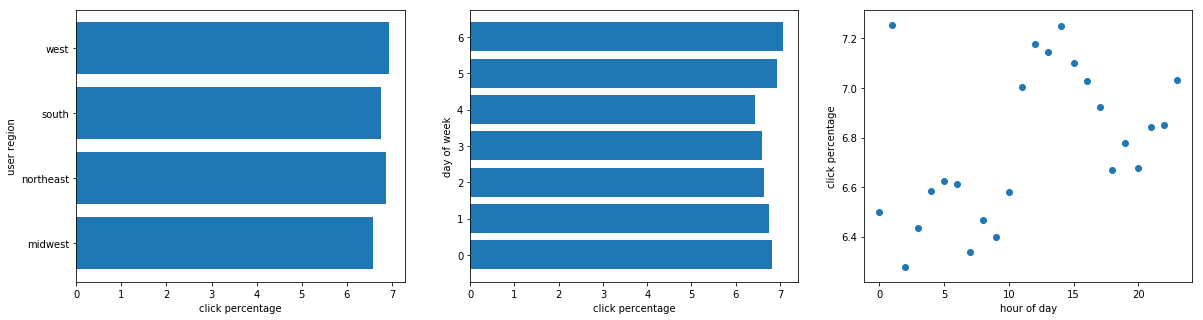

In [18]:
# The variables I would most strongly suspect to influence 'click' are: user region, marketplace, day of week, hour & app id.

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax = make_barh('user_region')
plt.xlabel('click percentage')
plt.ylabel('user region')

ax = fig.add_subplot(1,3,2)
ax = make_barh('dayOfWeek')
plt.xlabel('click percentage')
plt.ylabel('day of week')

ax = fig.add_subplot(1,3,3)
ax = make_scatter('hour')
plt.ylabel('click percentage')
plt.xlabel('hour of day')

Some quick observations:

* click percentage is quite low -- maximum for most of geographies/days is around 7%.
* geography doesn't seem to matter much
* there might be a "weekend effect," since the click rate is higher on Saturday and Sundays (days 5 & 6)
* there might be a difference between the click rate in the morning versus the afternoon (although 1AM seems to be an exception, as its click rate more resembles the afternoon).

In [19]:
# create new dummy variable that codes whether it's morning or not.

bids['is_morning'] = (bids['hour'] <= 11).astype('int')
bids['is_morning'].unique()

array([0, 1], dtype=int64)

In [20]:
make_pivot('is_morning')

,click
is_morning,
0,6.920260
1,6.531593


In [21]:
# create new dummy variable that codes whether it's weekend or not.

bids['is_weekend'] = (bids['dayOfWeek'] >= 5).astype('int')
bids['is_weekend'].unique()

array([1, 0], dtype=int64)

In [22]:
make_pivot('is_weekend')

,click
is_weekend,
0,6.658138
1,6.997844


In [23]:
# Show the relationship between app_id and the click rate.
# I'm sure there's a more efficient way to have done this but I forget the syntax

# There are 14,869 unique app_ids (out of 3,148,828 total rows; this is 0.472%). 
# The most popular app was used under 2% of the total.
# Conclusion: lots of variety in the apps used out there...

app_id_counts = bids['app_id'].value_counts()
app_id_counts_perc = app_id_counts / bids.shape[0] * 100
app_id_count_df = pd.concat([app_id_counts,app_id_counts_perc], axis=1)
app_id_count_df.columns = ['count', 'percentage']
app_id_count_df

,count,percentage
com.banananadco.blackjack,54134,1.719179
com.kiloo.subwaysurf,53670,1.704444
toy.blast.pop.cubes.puzzle,49726,1.579191
com.blackcircleapps.halloweenbingo,49273,1.564804
com.mobilityware.spider,44715,1.420052
com.mobilityware.CrownSolitaire,44357,1.408683
com.mobilityware.freecell,41566,1.320047
com.RocketGames.ClassicSlots,39294,1.247893
com.thumbspire.weedfirm2,34012,1.080148
com.spacegame.basic3,28483,0.904559


In [24]:
# Turns out there's only one value -- 'chartboost' -- for marketplace. We can thus ignore this variable from here on in.

print(bids['marketplace'].value_counts())
bids = bids.drop('marketplace', axis=1)

chartboost    3148828
Name: marketplace, dtype: int64


# Logistic Regression model

The bidding strategy fits a logistic regression model, since the dependent variable, *click* is binary. 

In [25]:
# Randomize the order of the data and use a 70-30 split train/test sets.

bids_random_order = bids.sample(len(bids)).reset_index()
total_rows = len(bids_random_order)
cutoff_percentage = int(len(bids_random_order) * .70)

train = bids_random_order.iloc[:cutoff_percentage, :]
test = bids_random_order.iloc[cutoff_percentage:, :]

# verify that the above code worked

print(len(train))
print(len(train) / len(bids))
print('\n')
print(len(test))
print(len(test) / len(bids))

2204179
0.699999809452914


944649
0.3000001905470861


In [26]:
# fit the logistic regression model

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(class_weight = 'balanced')

X_cols = ['app_id_num', 'region_midwest', 'region_northeast', 'region_south', 'region_west', 'is_morning', 'is_weekend']
y = 'click'

logit_model.fit(train[X_cols], train[y])
logit_model

C:\Users\djsch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [27]:
# display the coefficients of the regression as a dataframe

pd.DataFrame(logit_model.coef_, columns = [X_cols])

,app_id_num,region_midwest,region_northeast,region_south,region_west,is_morning,is_weekend
0,0.000035,-0.033982,0.005494,-0.015875,0.023158,-0.06467,0.043436


In [28]:
# make the predictions on the train set

predictions = logit_model.predict(train[X_cols])
train['predictions'] = predictions

# look at the distribution of predictions between 0 (no-click) and 1 (click)
train['predictions'].value_counts()

C:\Users\djsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    1276195
1     927984
Name: predictions, dtype: int64

In [29]:
# examine the predicted probabilities: first column is the predicted probability of not clicking; second column is the predicted probability of clicking

predicted_probs = logit_model.predict_proba(train[X_cols])
predicted_probs

array([[0.52985891, 0.47014109],
       [0.5129251 , 0.4870749 ],
       [0.52003233, 0.47996767],
       ...,
       [0.50858104, 0.49141896],
       [0.48838439, 0.51161561],
       [0.47965194, 0.52034806]])

In [30]:
# collect and display some statistics regarding the efficiency of the model
# I am aware that there are packages that can do this but I forget the syntax

number_correct = train[train['click'] == train['predictions']].shape[0]
accuracy = number_correct / train.shape[0]

true_positives = train[(train['click'] == 1) & (train['predictions'] == 1)].shape[0]
false_positives = train[(train['click'] == 0) & (train['predictions'] == 1)].shape[0]
true_negatives = train[(train['click'] == 0) & (train['predictions'] == 0)].shape[0]
false_negatives = train[(train['click'] == 1) & (train['predictions'] == 0)].shape[0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

pd.DataFrame([
    ['number correct', number_correct],
    ['accuracy', accuracy],
    ['true positives', true_positives],
    ['true negatives', true_negatives],
    ['false positives', false_positives],    
    ['false negatives', false_negatives],
    ['sensitivity', sensitivity],
    ['specificity', specificity]
],
columns = ['measure', 'value'])

,measure,value
0,number correct,1.260665e+06
1,accuracy,5.719431e-01
2,true positives,6.671900e+04
3,true negatives,1.193946e+06
4,false positives,8.612650e+05
5,false negatives,8.224900e+04
6,sensitivity,4.478747e-01
7,specificity,5.809360e-01


The *accuracy* gives the percentage of times the model was correct on all observation.

The *sensitivity* gives the percentage of times the model was able to correctly predict clicks.

The *specificity* gives the percentage of times the model was able to correctly predict non-clicks.

In [31]:
# run the model on the test set

predictions = logit_model.predict(test[X_cols])
test['predictions'] = predictions
test['predictions'].value_counts()

C:\Users\djsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    546704
1    397945
Name: predictions, dtype: int64

In [32]:
number_correct = test[test['click'] == test['predictions']].shape[0]
accuracy = number_correct / test.shape[0]

true_positives = test[(test['click'] == 1) & (test['predictions'] == 1)].shape[0]
false_positives = test[(test['click'] == 0) & (test['predictions'] == 1)].shape[0]
true_negatives = test[(test['click'] == 0) & (test['predictions'] == 0)].shape[0]
false_negatives = test[(test['click'] == 1) & (test['predictions'] == 0)].shape[0]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

pd.DataFrame([
    ['number correct', number_correct],
    ['accuracy', accuracy],
    ['true positives', true_positives],
    ['true negatives', true_negatives],
    ['false positives', false_positives],    
    ['false negatives', false_negatives],
    ['sensitivity', sensitivity],
    ['specificity', specificity]
],
columns = ['measure', 'value'])

,measure,value
0,number correct,539947.000000
1,accuracy,0.571585
2,true positives,28737.000000
3,true negatives,511210.000000
4,false positives,369208.000000
5,false negatives,35494.000000
6,sensitivity,0.447401
7,specificity,0.580645
